In [93]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", font_scale=1.2)

In [94]:
df = pd.read_csv('dataset.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215 entries, 0 to 2214
Columns: 181 entries, Unnamed: 0 to stateUBPercentViolReported
dtypes: float64(135), int64(30), object(16)
memory usage: 3.1+ MB


,Unnamed: 0,communityName,communityType,State,countyCode,communityCode,fold,pop,perHoush,pctBlack,...,staterateBurglaryPerThousand,state90%CIsigBurglaryPerThousand,state95%CIsigBurglaryPerThousand,stateLBBurglaryPerThousand,stateUBBurglaryPerThousand,stateratePercentViolReported,state90%CIsigPercentViolReported,state95%CIsigPercentViolReported,stateLBPercentViolReported,stateUBPercentViolReported
0,0,Marple,township,PA,45.0,47616.0,1,23123,2.82,0.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Tigard,city,OR,NaN,NaN,1,29344,2.43,0.74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Gloversville,city,NY,35.0,29443.0,1,16656,2.40,1.70,...,9.4,False,False,7.15,11.69,35.3,False,False,23.58,47.06
3,3,Bemidji,city,MN,7.0,5068.0,1,11245,2.76,0.53,...,19.5,False,False,15.71,23.29,39.1,False,False,31.22,46.90
4,4,Springfield,city,MO,NaN,NaN,1,140494,2.45,2.51,...,24.8,False,False,16.32,33.26,41.3,False,False,31.42,51.12


## Resolve More Data Inconsistencies

In [95]:
df = df.drop(["Unnamed: 0"], axis = 1)

In [96]:
# Remove Duplicates
num_duplicates = df.duplicated().sum()
print(num_duplicates)
if num_duplicates > 0:
    df = df.drop_duplicates()

0


## Analysis by State

Before doing any feature engineering or handling missing values, we can do a rudimentary exploratory data analysis of the data grouping by state 

In [97]:
# only keep rows with 2017-2019 data 
df2 = df[df['stateUBPercentViolReported'].notna()]
print(df2.shape[0])
print(df2['county_name'].isnull().sum())

1381
0


In [98]:
print("Number States: ", len(df2['State'].unique()))

Number States:  21


In [99]:
# Averaging levels of violent crime by state 

# state_data = df2.groupby('State').agg({'murdPerPop':'mean','rapesPerPop':'mean','robbbPerPop':'mean','assaultPerPop':'mean','burglPerPop':'mean','larcPerPop':'mean','autoTheftPerPop':'mean','arsonsPerPop':'mean','violentPerPop':'mean','nonViolPerPop':'mean','staterateViolPerThousand':'mean','stateratePropertyPerThousand':'mean','staterateViolPerThousandExcludingAssault':'mean','staterateBurglaryPerThousand':'mean','stateratePercentViolReported':'mean'}).reset_index()
state_data = df2.groupby('State').agg({'violentPerPop':'mean','staterateViolPerThousand':'mean','staterateViolPerThousandExcludingAssault':'mean','stateratePercentViolReported':'mean'}).reset_index()
print(state_data)

   State  violentPerPop  staterateViolPerThousand  \
0     AZ     551.094500                      36.8   
1     CA     808.238248                      22.4   
2     CO     540.769565                      45.0   
3     FL    1117.227791                      13.2   
4     GA     968.840278                      11.5   
5     IL            NaN                      19.8   
6     IN     499.966250                      27.5   
7     MA     832.651613                      20.5   
8     MD    1217.699167                      21.1   
9     MI            NaN                      21.1   
10    MN     501.910000                      20.8   
11    MO     446.006667                      21.5   
12    NC     973.036087                      13.3   
13    NJ     534.770196                       7.7   
14    NY     656.125250                      15.7   
15    OH     404.621714                      23.6   
16    PA     520.114200                      21.8   
17    TN     715.618235                      2

In [100]:
state_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   State                                     21 non-null     object 
 1   violentPerPop                             19 non-null     float64
 2   staterateViolPerThousand                  21 non-null     float64
 3   staterateViolPerThousandExcludingAssault  21 non-null     float64
 4   stateratePercentViolReported              21 non-null     float64
dtypes: float64(4), object(1)
memory usage: 968.0+ bytes


In [101]:
#helps figures render 

import plotly.io as pio
pio.renderers.default = 'iframe'

In [102]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(locations=state_data['State'], # Spatial coordinates
    z = state_data['violentPerPop'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Viol per Pop",
))

fig.update_layout(
    title_text = 'Average Violent Crimes per Pop by State 1990s',
    geo_scope='usa', # limited map scope to USA
)

fig.show()

In [103]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(locations=state_data['State'], # Spatial coordinates
    z = state_data['stateratePercentViolReported'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Viol per Thousand Reported",
))

fig.update_layout(
    title_text = 'Average Violent Crimes Reported per Thousand by State 2017-19',
    geo_scope='usa', # limite map scope to USA
)

fig.show()


We can see that between the 1990s and 2017-2019, Florida continues to have high numbers of reported crimes. Relative crime rates have risen in Texas, Ohio, and Massachusetts but have fallen in Maryland, North Carolina, and Georgia. 

In [104]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(locations=state_data['State'], # Spatial coordinates
    z = state_data['staterateViolPerThousand'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Viol per Thousand",
))

fig.update_layout(
    title_text = 'Average Violent Crimes per Thousand by State 2017-19',
    geo_scope='usa', # limite map scope to USA
)

fig.show()


However, we see a discrepancy between the levels of violent crime per thousand in 2017-19 with the reported levels of violent crime per thousand in 2017-29. In fact, in the levels of violenet crime per thousand (not necessarily reported) Florida has one of the lowest values. 

## Exploratory Data Analysis

In [105]:
# Summary Statistics
print("Summary statistics for numerical columns:")
print(df.describe())

Summary statistics for numerical columns:
       countyCode  communityCode         fold           pop     perHoush  \
count  994.000000     991.000000  2215.000000  2.215000e+03  2215.000000   
mean    65.565392   45253.449041     5.497968  5.313202e+04     2.707269   
std    117.838464   25394.501475     2.872300  2.046185e+05     0.334062   
min      1.000000      70.000000     1.000000  1.000500e+04     1.600000   
25%     11.000000   22980.000000     3.000000  1.437350e+04     2.500000   
50%     27.000000   47042.000000     5.000000  2.281400e+04     2.660000   
75%     80.500000   65805.000000     8.000000  4.306300e+04     2.850000   
max    840.000000   94597.000000    10.000000  7.322564e+06     5.280000   

          pctBlack     pctWhite     pctAsian      pctHisp     pct12-21  ...  \
count  2215.000000  2215.000000  2215.000000  2215.000000  2215.000000  ...   
mean      9.335192    83.981959     2.667955     7.949883    14.445937  ...   
std      14.247106    16.420406     

### Observations: 

- Many missing values from the merged data and also from pre-exisiting data 

## Handle Missing Values

Missing values can be handled using median/mode or KNN method. After handling missing values, 

In [107]:
# Handling missing values using medianfor numerical and mode for categorical
df_med = df.copy(deep=True)
missing_counts = df_med.isnull().sum()
print(missing_counts)
missing_pct = (missing_counts / len(df_med)) * 100
print(missing_pct)

numeric_cols = df_med.select_dtypes(include=[np.number]).columns
df_med[numeric_cols] = df_med[numeric_cols].fillna(df_med[numeric_cols].median())

cat_cols = df_med.select_dtypes(include=['object']).columns
for col in cat_cols:
    df_med[col] = df_med[col].fillna(df_med[col].mode()[0])

communityName                          0
communityType                          4
State                                  0
countyCode                          1221
communityCode                       1224
                                    ... 
stateratePercentViolReported         834
state90%CIsigPercentViolReported     834
state95%CIsigPercentViolReported     834
stateLBPercentViolReported           834
stateUBPercentViolReported           834
Length: 180, dtype: int64
communityName                        0.000000
communityType                        0.180587
State                                0.000000
countyCode                          55.124153
communityCode                       55.259594
                                      ...    
stateratePercentViolReported        37.652370
state90%CIsigPercentViolReported    37.652370
state95%CIsigPercentViolReported    37.652370
stateLBPercentViolReported          37.652370
stateUBPercentViolReported          37.652370
Length: 180, dtyp

In [108]:
# Handling missing values using KNN 
from sklearn.impute import KNNImputer
df_knn = df.copy(deep=True)

missing_counts = df_knn.isnull().sum()
print(missing_counts)
missing_pct = (missing_counts / len(df_knn)) * 100
print(missing_pct)

# Initialize the imputer
imputer = KNNImputer(n_neighbors=5)
df_knn[numeric_cols] = imputer.fit_transform(df_knn[numeric_cols])

# Imputation for categorical columns 
for col in cat_cols:
    if df_knn[col].isnull().sum() > 0:
        df_knn[col] = df_knn[col].fillna(df_knn[col].mode()[0])


communityName                          0
communityType                          4
State                                  0
countyCode                          1221
communityCode                       1224
                                    ... 
stateratePercentViolReported         834
state90%CIsigPercentViolReported     834
state95%CIsigPercentViolReported     834
stateLBPercentViolReported           834
stateUBPercentViolReported           834
Length: 180, dtype: int64
communityName                        0.000000
communityType                        0.180587
State                                0.000000
countyCode                          55.124153
communityCode                       55.259594
                                      ...    
stateratePercentViolReported        37.652370
state90%CIsigPercentViolReported    37.652370
state95%CIsigPercentViolReported    37.652370
stateLBPercentViolReported          37.652370
stateUBPercentViolReported          37.652370
Length: 180, dtyp

## !!!! Feel free to change this part depending on what you guys think makes sense :

Between the two methods, it might make more sense to utilize the knn method as for the categorical columns like state, the nearest neighbor might be closer to the truth value than the mode

In [109]:
df = df_knn 

## Handling Outliers

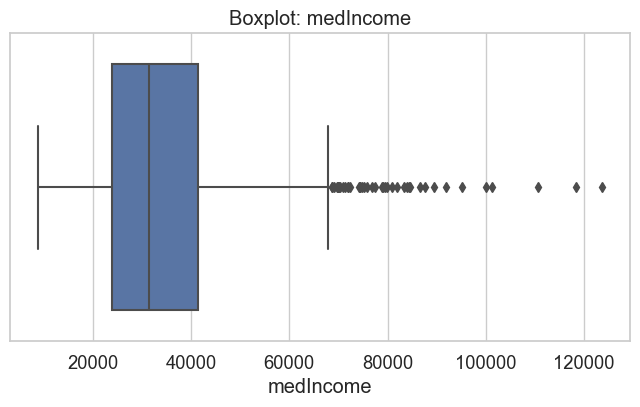

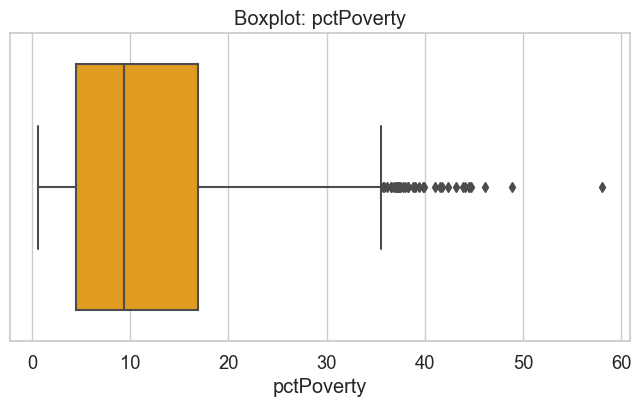

In [110]:
if 'medIncome' in df.columns:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df['medIncome'])
    plt.title("Boxplot: medIncome")
    plt.show()
if 'pctPoverty' in df.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df['pctPoverty'], color="orange")
    plt.title("Boxplot: pctPoverty")
    plt.show()

In [111]:
# Handling outliers
from scipy.stats.mstats import winsorize
for col in numeric_cols:
    cap = df[col].quantile(0.99)
    df[col] = np.where(df[col] > cap, cap, df[col])
df_plot = df.copy()

## More Exploratory Data Analysis

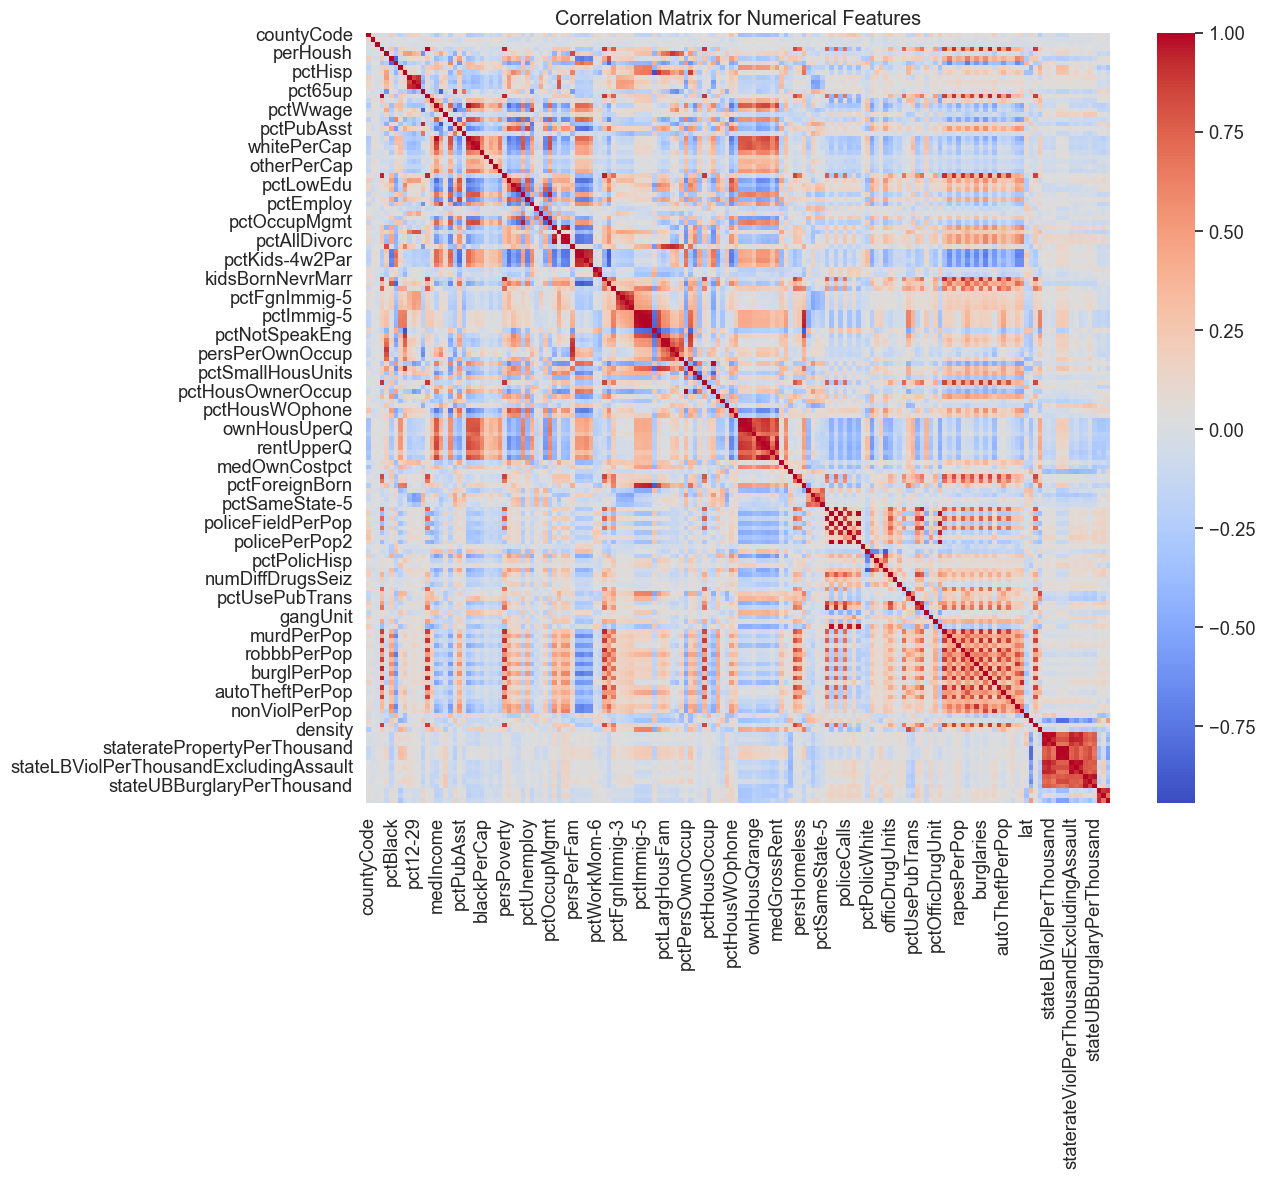

In [112]:
#Heat map
num_cols = df.select_dtypes(include=[np.number]).columns
corr = df[num_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title("Correlation Matrix for Numerical Features")
plt.show()

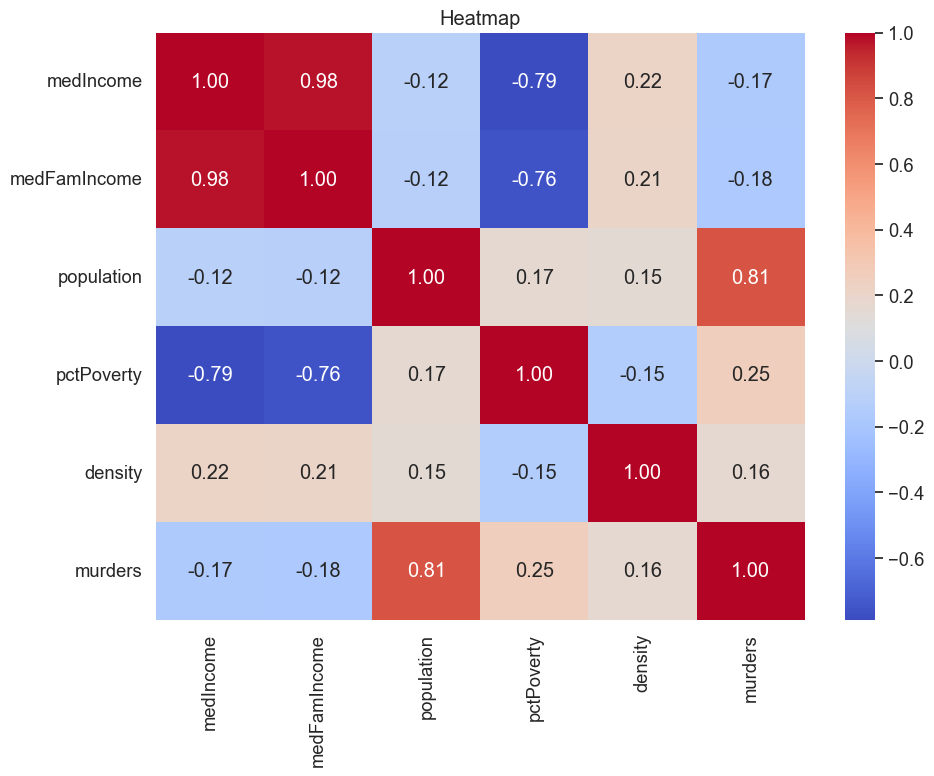

In [113]:
# Heatmap of selected features

selected_vars = ['medIncome', 'medFamIncome', 'population', 'pctPoverty', 'density', 'murders']
selected_vars = [var for var in selected_vars if var in df.columns]
if len(selected_vars) > 1:
    plt.figure(figsize=(10, 8))
    corr_matrix = df[selected_vars].corr()
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Heatmap")
    plt.tight_layout()
    #plt.savefig("correlation_heatmap.png")
    #plt.close()
    corr_matrix.to_csv("correlation_matrix.csv")

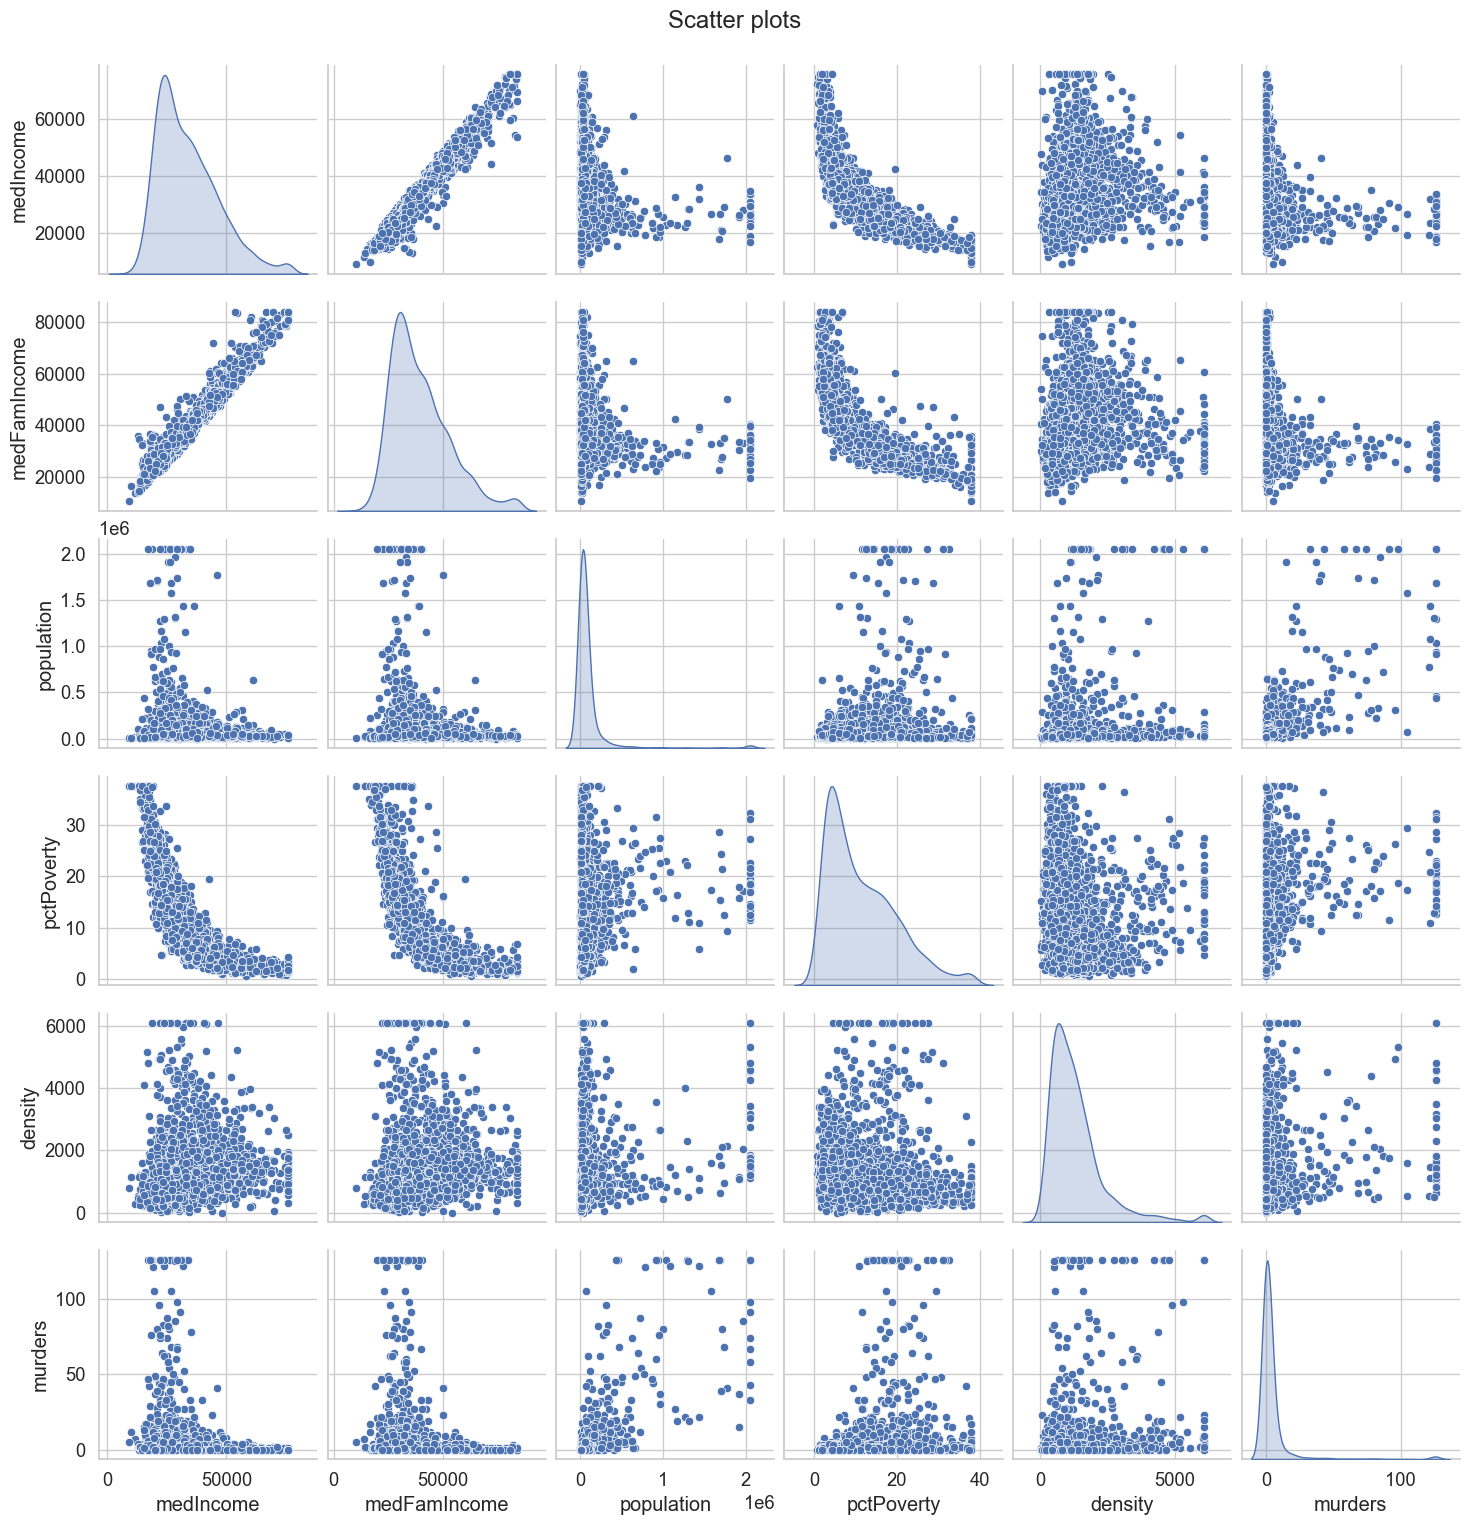

In [114]:
#Scatter plots
if len(selected_vars) >= 2:
    pairplot_fig = sns.pairplot(df[selected_vars], diag_kind='kde')
    pairplot_fig.fig.suptitle("Scatter plots", y=1.02)
    #pairplot_fig.savefig("scatter.png")
    #plt.close()

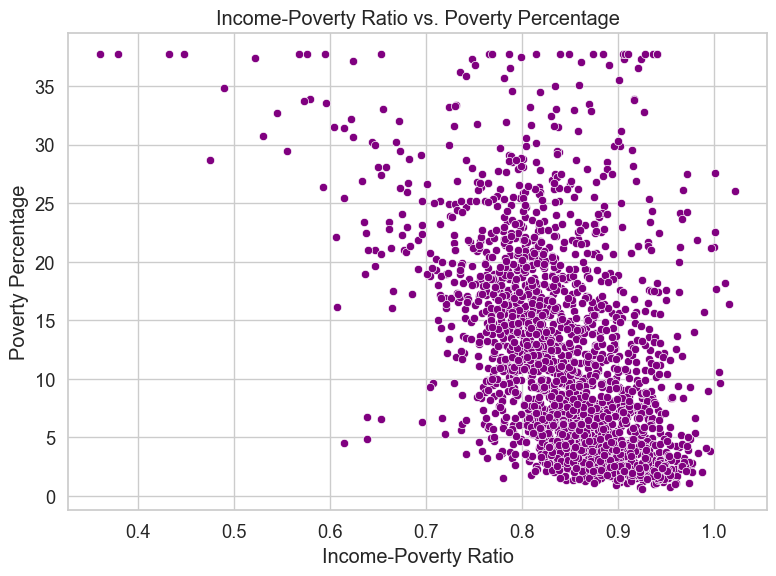

In [115]:
if ('medIncome' in df.columns) and ('medFamIncome' in df.columns):
    df['income_poverty_ratio'] = df['medIncome'] / df['medFamIncome']
    df['income_poverty_ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)
    df['income_poverty_ratio'] = df['income_poverty_ratio'].fillna(df['income_poverty_ratio'].median())
    if 'pctPoverty' in df.columns:
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x='income_poverty_ratio', y='pctPoverty', data=df, color='purple')
        plt.title("Income-Poverty Ratio vs. Poverty Percentage")
        plt.xlabel("Income-Poverty Ratio")
        plt.ylabel("Poverty Percentage")
        plt.tight_layout()

In [116]:
# Indicator grouping

# 1. Population-related indicators: population density, racial distribution (pctBlack, pctWhite, pctAsian, pctHisp), 
# and immigration information.
pop_cols = ["popDensity", "pctBlack", "pctWhite", "pctAsian", "pctHisp", "numForeignBorn"]

# 2. Economic-related indicators: income, household income, per capita income, poverty rate (percentage and number of people), and unemployment rate.
econ_cols = ["medIncome", "medFamIncome", "perCapInc", "pctPoverty", "persPoverty", "pctUnemploy"]

# 3. Environmental-related indicators: household structure, age structure, and housing rental situation.
env_cols = ["persPerFam", "pct2Par", "pct65up", "medGrossRent"]

# 4. Public security management indicators: police force allocation, police budget, etc.
sec_cols = ["numPolice", "policePerPop", "policeOperBudget", "policBudgetPerPop"]

print("population indicator：", [col for col in pop_cols if col in df_plot.columns])
print("economic indicator：", [col for col in econ_cols if col in df_plot.columns])
print("environment indicator：", [col for col in env_cols if col in df_plot.columns])
print("public security indicator：", [col for col in sec_cols if col in df_plot.columns])

population indicator： ['popDensity', 'pctBlack', 'pctWhite', 'pctAsian', 'pctHisp', 'numForeignBorn']
economic indicator： ['medIncome', 'medFamIncome', 'perCapInc', 'pctPoverty', 'persPoverty', 'pctUnemploy']
environment indicator： ['persPerFam', 'pct2Par', 'pct65up', 'medGrossRent']
public security indicator： ['numPolice', 'policePerPop', 'policBudgetPerPop']


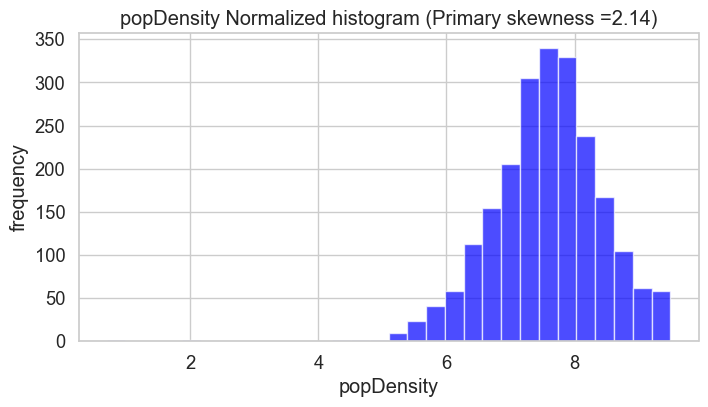

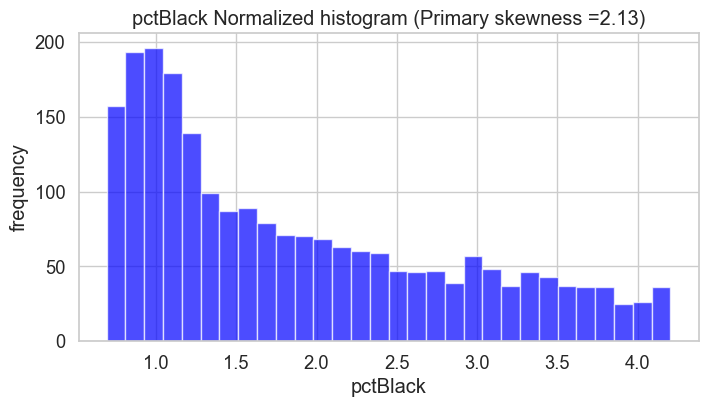

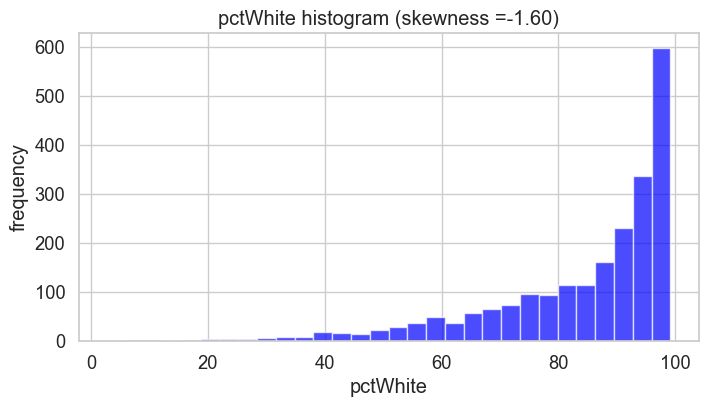

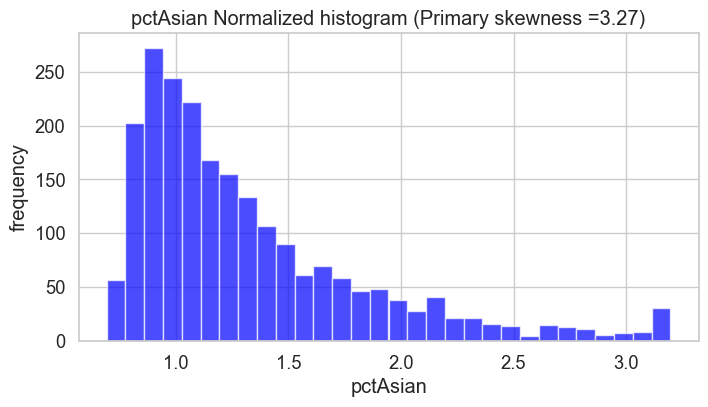

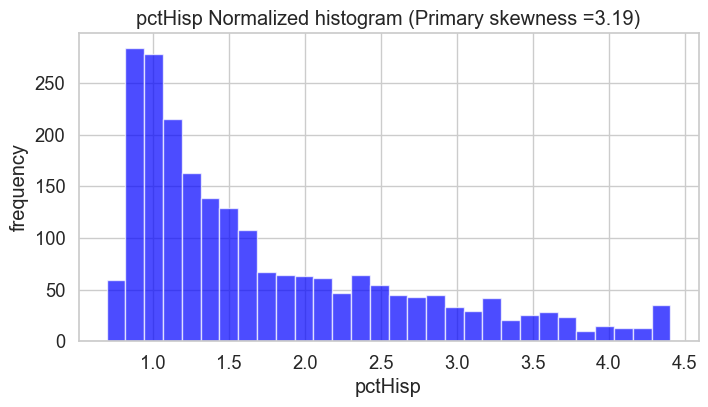

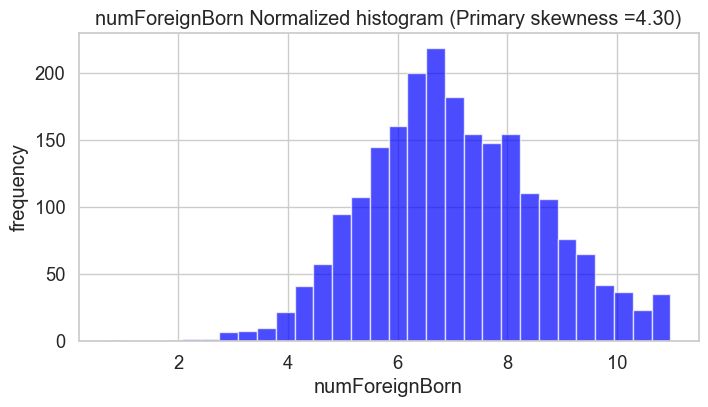

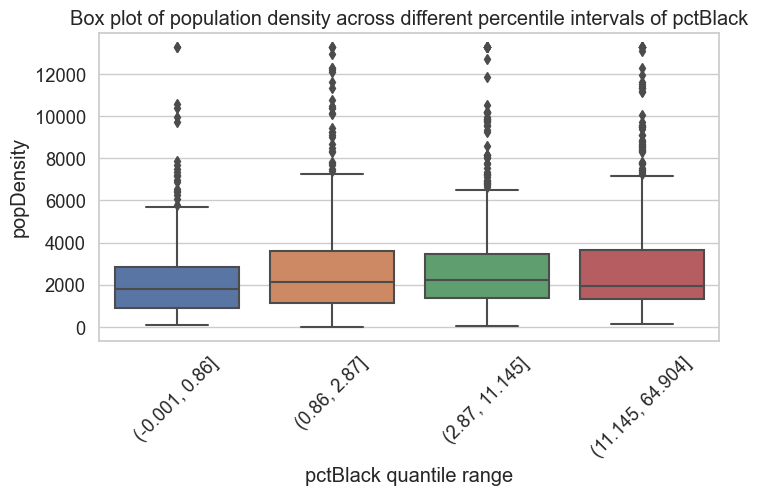

In [117]:
# Visualization of population-related indicators

# Plot histograms - numerical variables
for col in pop_cols:
    plt.figure(figsize=(8, 4))
    skewness = df_plot[col].skew()
    if skewness > 1:
        shifted = df_plot[col] - df_plot[col].min() + 1
        norm_data = np.log1p(shifted)
        plt.hist(norm_data, bins=30, alpha=0.7, color='blue')
        plt.title(f'{col} Normalized histogram (Primary skewness ={skewness:.2f})')
    else:
        plt.hist(df_plot[col], bins=30, alpha=0.7, color='blue')
        plt.title(f'{col} histogram (skewness ={skewness:.2f})')
    plt.xlabel(col)
    plt.ylabel("frequency")
    plt.show()


# Boxplots：
# The data contains racial information and population density variables, allowing 
# for a comparison of population density distribution across different racial groups.
if "popDensity" in df_plot.columns and "pctBlack" in df_plot.columns:
    plt.figure(figsize=(8, 4))
    # It is assumed that pctBlack is used as the basis for classification
    df_plot['pctBlack_bin'] = pd.qcut(df_plot["pctBlack"], q=4, duplicates='drop')
    sns.boxplot(x='pctBlack_bin', y='popDensity', data=df_plot)
    plt.title('Box plot of population density across different percentile intervals of pctBlack')
    plt.xlabel('pctBlack quantile range')
    plt.ylabel('popDensity')
    plt.xticks(rotation=45)
    plt.show()
    

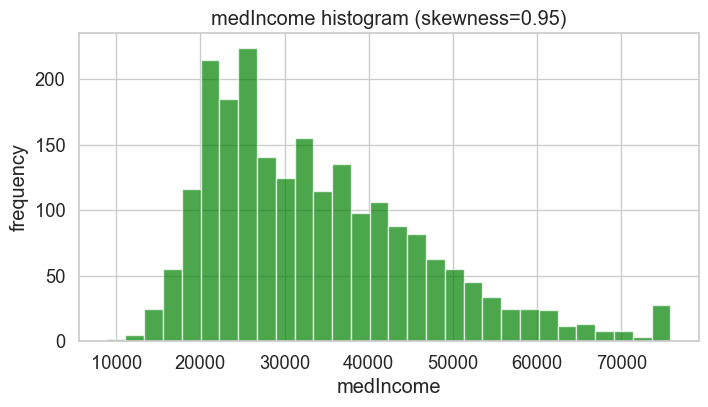

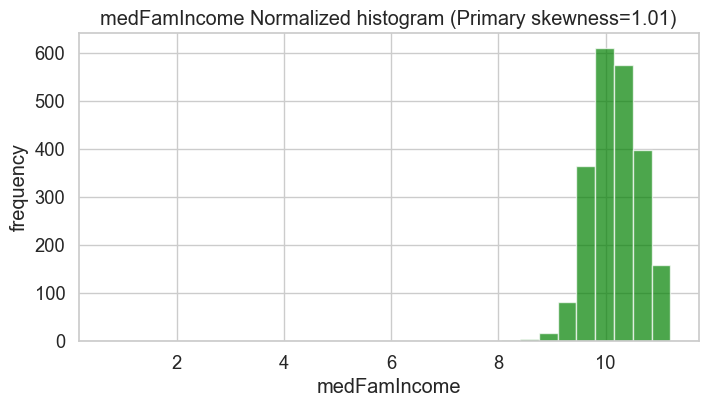

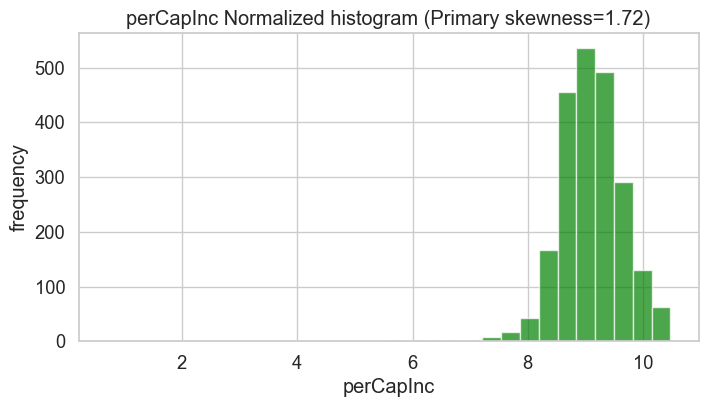

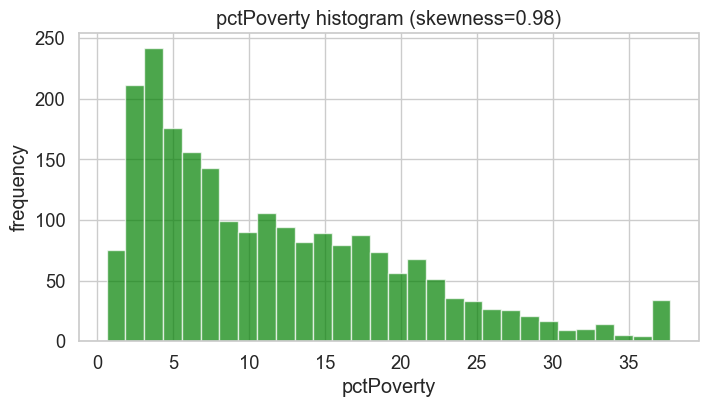

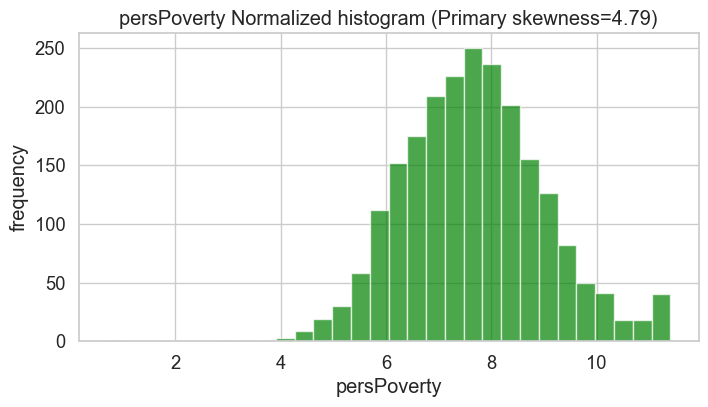

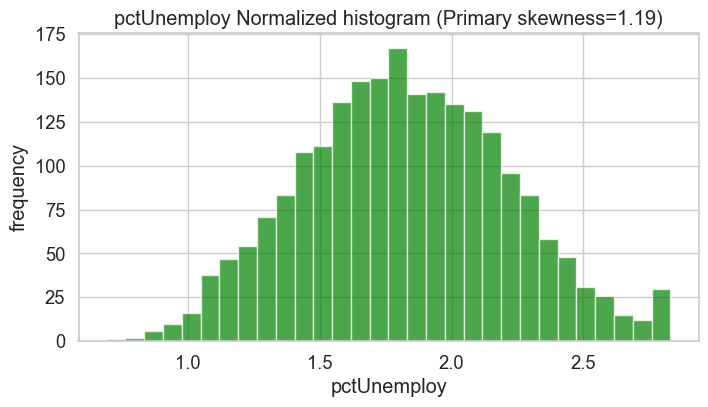

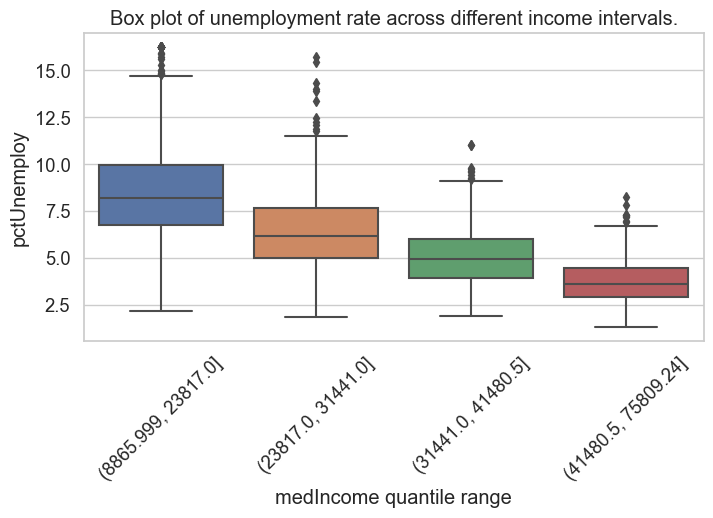

In [118]:
# Visualization of economic-related indicators


# Plot histograms - numerical variables
for col in econ_cols:
    plt.figure(figsize=(8, 4))
    skewness = df_plot[col].skew()
    if skewness > 1:
        shifted = df_plot[col] - df_plot[col].min() + 1
        norm_data = np.log1p(shifted)
        plt.hist(norm_data, bins=30, alpha=0.7, color='green')
        plt.title(f'{col} Normalized histogram (Primary skewness={skewness:.2f})')
    else:
        plt.hist(df_plot[col], bins=30, alpha=0.7, color='green')
        plt.title(f'{col} histogram (skewness={skewness:.2f})')
    plt.xlabel(col)
    plt.ylabel("frequency")
    plt.show()


# Boxplots：
#  Compare unemployment at different income levels
if "pctUnemploy" in df_plot.columns and "medIncome" in df_plot.columns:
    # Divide medIncome into 4 quantiles
    df_plot['medIncome_bin'] = pd.qcut(df_plot["medIncome"], q=4, duplicates='drop')
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='medIncome_bin', y='pctUnemploy', data=df_plot)
    plt.title('Box plot of unemployment rate across different income intervals.')
    plt.xlabel('medIncome quantile range')
    plt.ylabel('pctUnemploy')
    plt.xticks(rotation=45)
    plt.show()

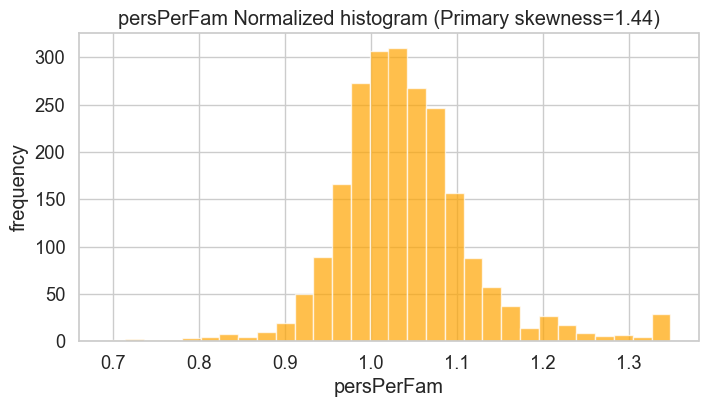

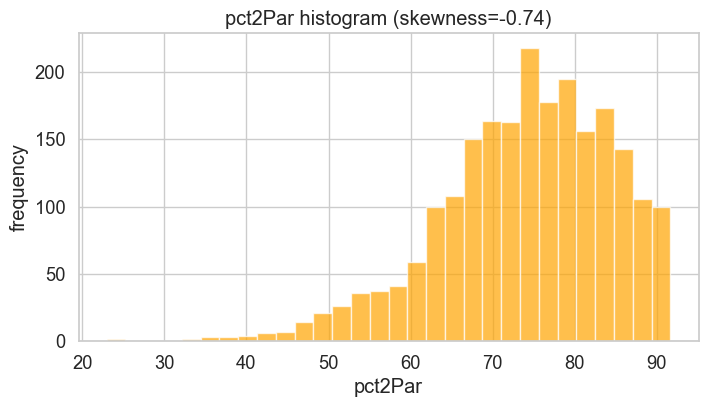

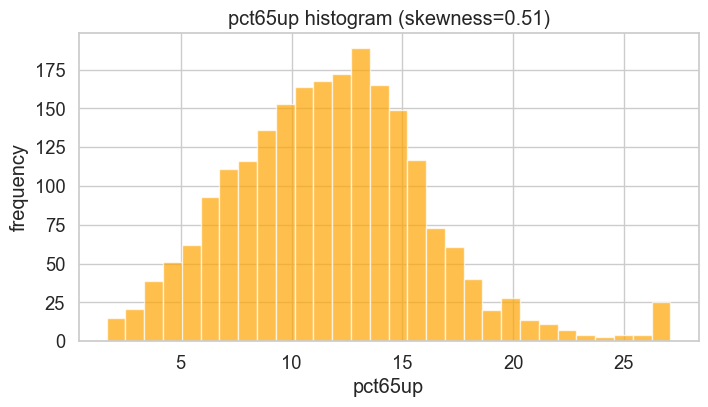

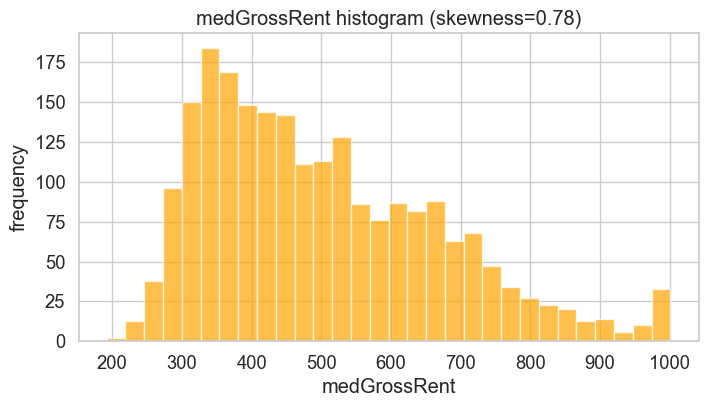

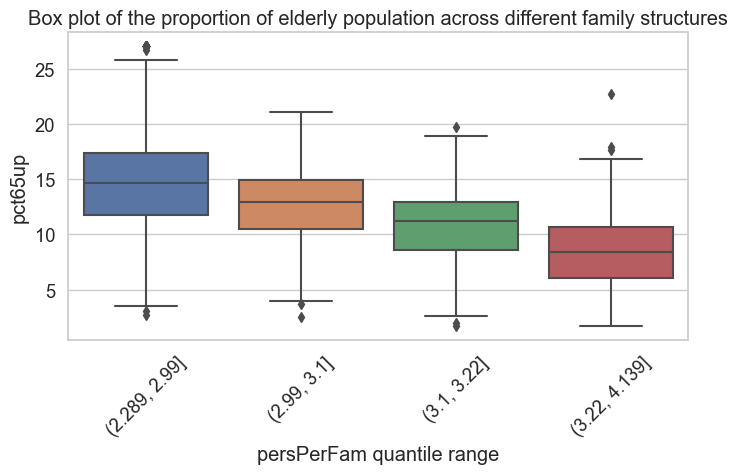

In [119]:
# Environmental-related indicators

for col in env_cols:
    plt.figure(figsize=(8, 4))
    skewness = df_plot[col].skew()
    if skewness > 1:
        shifted = df_plot[col] - df_plot[col].min() + 1
        norm_data = np.log1p(shifted)
        plt.hist(norm_data, bins=30, alpha=0.7, color='orange')
        plt.title(f'{col} Normalized histogram (Primary skewness={skewness:.2f})')
    else:
        plt.hist(df_plot[col], bins=30, alpha=0.7, color='orange')
        plt.title(f'{col} histogram (skewness={skewness:.2f})')
    plt.xlabel(col)
    plt.ylabel("frequency")
    plt.show()


# Boxplots：
# Compare the proportion of elderly population ('pct65up') across different family structures 
# using 'persPerFam' (persons per family).
if "persPerFam" in df_plot.columns and "pct65up" in df_plot.columns:
    df_plot['persPerFam_bin'] = pd.qcut(df_plot["persPerFam"], q=4, duplicates='drop')
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='persPerFam_bin', y='pct65up', data=df_plot)
    plt.title('Box plot of the proportion of elderly population across different family structures')
    plt.xlabel('persPerFam quantile range')
    plt.ylabel('pct65up')
    plt.xticks(rotation=45)
    plt.show()

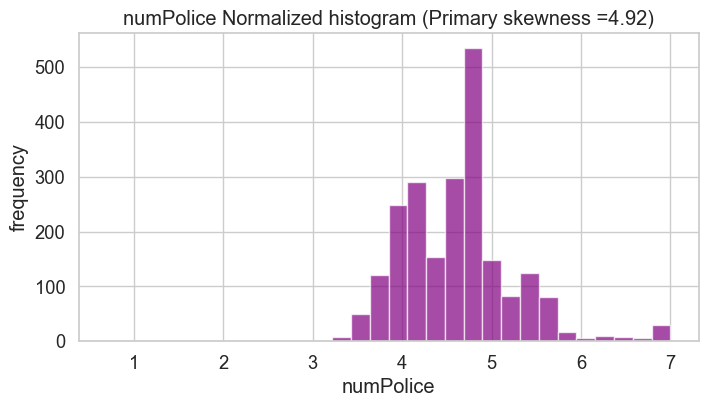

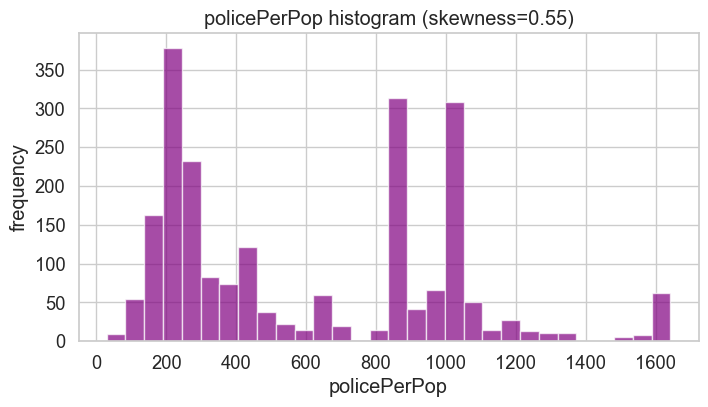

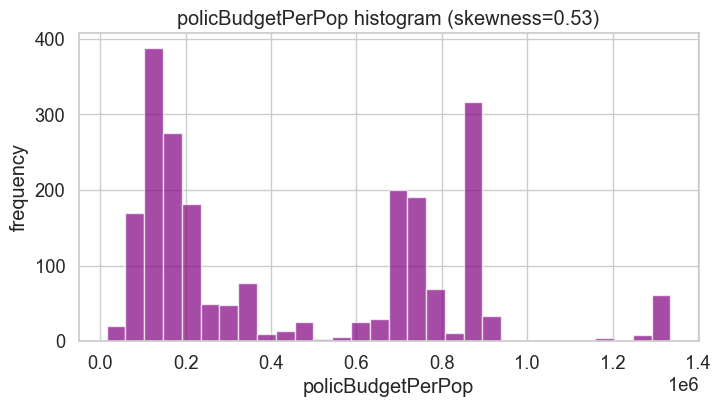

In [120]:
# Public security management indicators

sec_num = [col for col in sec_cols if col in df_plot.columns and df_plot[col].dtype != 'object']


for col in sec_num:
    plt.figure(figsize=(8, 4))
    skewness = df_plot[col].skew()
    if skewness > 1:
        shifted = df_plot[col] - df_plot[col].min() + 1
        norm_data = np.log1p(shifted)
        plt.hist(norm_data, bins=30, alpha=0.7, color='purple')
        plt.title(f'{col} Normalized histogram (Primary skewness ={skewness:.2f})')
    else:
        plt.hist(df_plot[col], bins=30, alpha=0.7, color='purple')
        plt.title(f'{col} histogram (skewness={skewness:.2f})')
    plt.xlabel(col)
    plt.ylabel("frequency")
    plt.show()

# Boxplot：
#  Compare the police budget situation under different police force levels
if "policeOperBudget" in df_plot.columns and "policBudgetPerPop" in df_plot.columns:
    df_plot['policeOperBudget_bin'] = pd.qcut(df_plot["policeOperBudget"], q=4, duplicates='drop')
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='policeOperBudget_bin', y='policBudgetPerPop', data=df_plot)
    plt.title('Box plot of police budget under different police force allocations')
    plt.xlabel('policeOperBudget quantile range')
    plt.ylabel('policBudgetPerPop')
    plt.xticks(rotation=45)
    plt.show()

## Feature Engineering and Selection

In [121]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
#standardize 
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# normalize
minmax = MinMaxScaler()
df[numeric_cols] = minmax.fit_transform(df[numeric_cols])

# LabelEncoding 
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

Variance proportion explained by each principal component.：
PC1: 0.2095
PC2: 0.1478
PC3: 0.0791
PC4: 0.0626
PC5: 0.0468


/Users/iris/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 65306 (\N{FULLWIDTH COLON}) missing from current font.



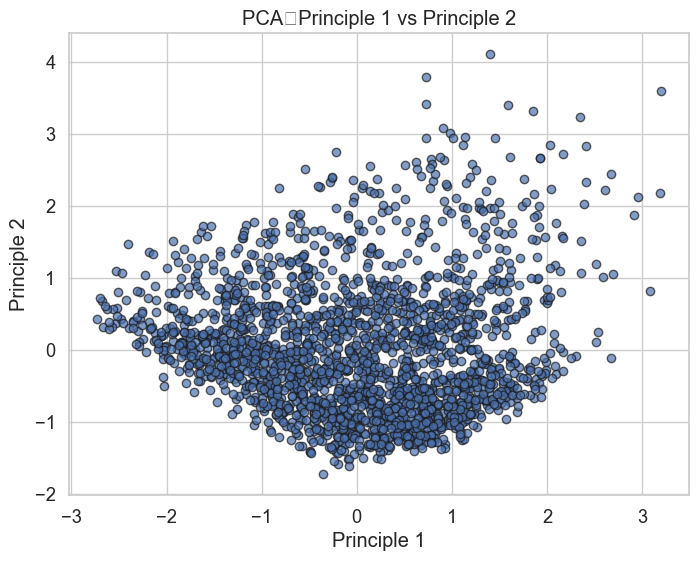

In [122]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=5)  
pca_result = pca.fit_transform(df[numeric_cols])
print("Variance proportion explained by each principal component.：")
for i, ratio in enumerate(pca.explained_variance_ratio_):
    print(f'PC{i+1}: {ratio:.4f}')
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.7, edgecolors='k')
plt.xlabel('Principle 1')
plt.ylabel('Principle 2')
plt.title('PCA：Principle 1 vs Principle 2')
plt.show()

In [123]:
# The categorical columns are either ordinate or have some similar categories (e.g. State) so label encoding makes sense
print(cat_cols)

Index(['communityName', 'communityType', 'State', 'county_name', 'military',
       'incorporated', 'state90%CIsigViolPerThousand',
       'state95%CIsigViolPerThousand', 'state90%CIsigPropertyPerThousand',
       'state95%CIsigPropertyPerThousand',
       'state90%CIsigViolPerThousandExcludingAssault',
       'state95%CIsigViolPerThousandExcludingAssault',
       'state90%CIsigBurglaryPerThousand', 'state95%CIsigBurglaryPerThousand',
       'state90%CIsigPercentViolReported', 'state95%CIsigPercentViolReported'],
      dtype='object')


## Final Clean Data

In [124]:
df.to_csv("final_data_cleaned.csv", index=False)

## References:
- https://plotly.com/python/choropleth-maps/#using-builtin-country-and-state-geometries
- https://community.plotly.com/t/plotly-not-rendering-in-jupyterlab-just-leaving-an-empty-space/85588/6